# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [1]:
import requests
import requests_cache
requests_cache.install_cache('cache')

import json
import pandas as pd
KEY = "1XwABqIcMDByNTGgMz2z63gcZdwkLavZHJAzzDEJ"

In [2]:
def ndb_search(key,term,data_source = None,sort = "r"):
    '''
    Makes a search request.
    Input: key (data.gov API key, string), term (the search term, string),
           data_source (data source, must be either 'Branded Food Products' or 'Standard Reference'),
           and sort (Sort the results by food name (n) or by search relevance (r))
    Output: the search result items as a list (for 0 items, return an empty list)
    
    '''   
    response = requests.get(url = "https://api.nal.usda.gov/ndb/search", params = {
                 "q": term,
                 "format": "json",
                 "sort": sort,
                 "max": 50,
                 "ds": data_source,
                 "api_key": key
             })
    result = response.json()
    try:
        return result[u'list'][u'item']
    except:
        return []

In [3]:
df_egg = ndb_search(KEY,"quail eggs")
df_egg

[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [4]:
fresh = pd.read_csv(r'C:\Users\kevin\study\STA141B\assignment_4\fresh.csv')

In [5]:
def judge(keywords,item):
    """
    Find out whether all of the words in keywords are in item.
    Input: keywords (words connected with ",", string) and item (string)
    Output: True or False
    """
    s = keywords.replace(",", " ").split()
    for word in s:
        if word not in item:
            return False
    else:
        return True

In [6]:
from nltk.stem.snowball import SnowballStemmer

In [17]:
def ndb_from_file(fresh):
    """
    Return the ndb for all kinds of food in fresh[u"food"].
    Input: fresh(pandas.DataFrame)
    Output: pandas.DataFrame which contains names of foods and ndbno
    """
    ndb = []
    for food in fresh[u"food"]:
        original = food.replace("_"," ").split()
        lemma = [SnowballStemmer("english").stem(word) for word in original]
        search = " ".join(lemma)+", raw"
        l = pd.DataFrame(ndb_search(KEY,search,data_source='Standard Reference',sort="r"))
        result = []
        if l.shape[0] > 0:
            l = l[l[u"ds"]=="SR"]
            for i in xrange(l.shape[0]):
                if judge(search, l.iloc[i][u"name"].lower()):
                    result.append(l.iloc[i][u"ndbno"])
        ndb.append(result)
    
    NDBNO = pd.DataFrame({"food":fresh["food"],"ndbno":ndb})
    return NDBNO

In [18]:
NDBNO = ndb_from_file(fresh)
NDBNO.shape

(49, 2)

In [40]:
NDBNO.head()

,food,ndbno
0,watermelon,[09326]
1,cantaloupe,[09181]
2,tangerines,"[09221, 09218]"
3,strawberries,[09316]
4,plums,"[09279, 09061, 09145]"


<p>Foods in data source "Branded Food Products" are branded, so I only search from the "Standard Reference". I use "food_name, raw" as search terms. Among all the results for a kind of food, I only record the <b>ndbno</b> of items with its name contains all the words in the search term. (e.g. For "lettuce_iceberg", I search "lettuce iceberg, raw", and record the result if its name contains "lettuce", "iceberg" and "raw")</p>
<p>Some kinds of foods have more than one ndbno. A reason is that this kind of food has many varieties. (e.g. Raw pineapple has 3 varieties in the data set, "all varieties", "traditional varieties" and "extra sweet variety")</p>
<p>At first this method fails to find the ndbno of some foods. The main reason is the plural form. (e.g. The result of searching for "cucumbers" are all in singular form. Then I do not record it as it does not contain string "cucumbers") So I apply stem method to change the searching keywords (food_name). Then the result becomes better.</p>

__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [23]:
def ndb_report(key,ndbno):
    """
    Request a basic (type = "b") food report on the nurtients.
    Input: key (data.gov API key, string) and ndbno (the NDB number for a kind of food, string)
    Output: the list of nutrients for the food.
    """
    
    url = "https://api.nal.usda.gov/ndb/V2/reports"
    response = requests.get(url,params={
        "api_key": key,
        "ndbno": ndbno,
        "type": "b",
        "format": "json"
    })
    return response.json()["foods"][0]["food"]["nutrients"]

In [12]:
plums = ndb_report(KEY, "09279")
plums[0]

{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}

__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [20]:
def ndb_nutrients(NDBNO):
    """
    Return the nutrients of foods in NDBNO
    Input: NDBNO(pandas.DataFrame) which contains the ndbno for foods.
    Output: A pandas.DataFrame of nutrients for each food.
    """
    nutrients = pd.DataFrame()
    for i in xrange(NDBNO.shape[0]):
        d = {}
        if len(NDBNO.iloc[i][u"ndbno"])>0:
            no = NDBNO.iloc[i][u"ndbno"][0]
            response = ndb_report(KEY, no)
            j = 0
            while True:
                try:
                    d[response[j][u"name"]] = float(response[j][u"measures"][0][u"value"])
                    j += 1
                except:
                    break
        d["food"] = NDBNO.iloc[i][u"food"]
        new = pd.DataFrame(d,index = [i])
        nutrients = pd.concat([nutrients,new])
    return nutrients

<p>As the ndbno are sorted by relevance, I use the first ndbno as the right one.<p>

In [25]:
nutrients = ndb_nutrients(NDBNO)
fresh = fresh.merge(nutrients,left_on='food', right_on='food')
fresh.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,Caffeine,"Calcium, Ca","Carbohydrate, by difference",...,"Vitamin A, RAE",Vitamin B-12,Vitamin B-6,"Vitamin C, total ascorbic acid",Vitamin D,Vitamin D (D2 + D3),Vitamin E (alpha-tocopherol),Vitamin K (phylloquinone),Water,"Zinc, Zn"
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,0.0,11.0,11.63,...,43.0,0.0,0.069,12.5,0.0,0.0,0.08,0.2,140.83,0.15
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,0.0,16.0,14.44,...,299.0,0.0,0.127,65.0,0.0,0.0,0.09,4.4,159.57,0.32
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,0.0,44.0,24.95,...,32.0,0.0,0.104,76.6,0.0,0.0,0.32,0.0,219.58,0.07
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit,0.0,24.0,11.67,...,2.0,0.0,0.071,89.4,0.0,0.0,0.44,3.3,138.24,0.21
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit,0.0,10.0,18.84,...,28.0,0.0,0.048,15.7,0.0,0.0,0.43,10.6,143.93,0.17


In [26]:
fresh.dtypes

form                                   object
price_per_lb                          float64
yield                                 float64
lb_per_cup                            float64
price_per_cup                         float64
food                                   object
type                                   object
Caffeine                              float64
Calcium, Ca                           float64
Carbohydrate, by difference           float64
Cholesterol                           float64
Energy                                float64
Fatty acids, total monounsaturated    float64
Fatty acids, total polyunsaturated    float64
Fatty acids, total saturated          float64
Fatty acids, total trans              float64
Fiber, total dietary                  float64
Folate, DFE                           float64
Iron, Fe                              float64
Magnesium, Mg                         float64
Niacin                                float64
Phosphorus, P                     

In [27]:
fresh['standardized_yield'] = (fresh['yield'] - min(fresh['yield']))/(max(fresh['yield']) - min(fresh['yield']))
fresh['standardized_price_per_cup'] = (fresh['price_per_cup'] - min(fresh['price_per_cup']))/(max(fresh['price_per_cup']) - min(fresh['price_per_cup']))
fresh['standardized_energy'] = (fresh['Energy'] - min(fresh['Energy']))/(max(fresh['Energy']) - min(fresh['Energy']))
fresh['index'] = ((fresh['standardized_yield']**2 + (1-fresh['standardized_price_per_cup'])**2 + fresh['standardized_energy']**2)/3)**0.5

<p>I define an index in order to take yield, price per cup and kcal together into consideration. First I rescale these 3 values in to range of between 0 and 1, then</p>
$$index = \sqrt{\frac{(standardized\_yield^{2} + (1 - standardized\_price\_per\_cup)^{2} + standardized\_energy^{2}}{3}} $$
<p>The index in between 0 and 1. The larger the index, the better the food provides the combination.</p>

In [31]:
result = fresh.sort_values(by = ['index'], axis = 0, ascending = False)
result.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,Caffeine,"Calcium, Ca","Carbohydrate, by difference",...,Vitamin D,Vitamin D (D2 + D3),Vitamin E (alpha-tocopherol),Vitamin K (phylloquinone),Water,"Zinc, Zn",standardized_yield,standardized_price_per_cup,standardized_energy,index
46,Fresh1,2.235874,0.740753,0.319670,0.964886,avocados,vegetables,NaN,30.0,19.87,...,0.0,0.0,4.53,48.3,166.36,1.56,0.465718,0.325599,1.000000,0.746483
26,"Fresh, consumed with peel1",1.295931,0.970000,0.264555,0.353448,cucumbers,vegetables,0.0,19.0,2.87,...,0.0,0.0,0.04,9.6,128.65,0.23,0.757867,0.070648,0.034121,0.692633
25,"Fresh, consumed with peel1",1.295931,0.970000,0.264555,0.353448,cucumbers,vegetables,0.0,19.0,2.87,...,0.0,0.0,0.04,9.6,128.65,0.23,0.757867,0.070648,0.034121,0.692633
29,Fresh1,1.213039,0.950000,0.242508,0.309655,lettuce_iceberg,vegetables,0.0,13.0,2.14,...,0.0,0.0,0.13,17.4,68.86,0.11,0.732379,0.052387,0.018373,0.691541
47,Fresh1,2.807302,1.050000,0.286601,0.766262,kale,vegetables,0.0,24.0,1.40,...,0.0,0.0,0.25,112.8,13.45,0.09,0.859817,0.242779,0.013123,0.661524


<p>Avocados, cucumbers, lettuce iceberg and kale are the best foods in this criterion.</p>

In [33]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")

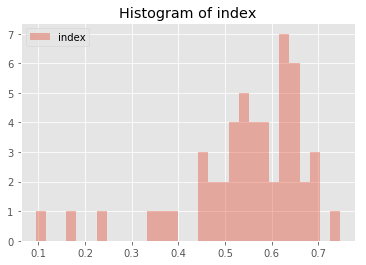

In [39]:
plt.hist(result['index'].dropna(), bins = 30, alpha=0.4, label = 'index')
plt.title('Histogram of index')
plt.legend(loc = 2)
plt.show()

In [36]:
fresh['nutrients_total'] = fresh["Fiber, total dietary"] + fresh["Protein"] + fresh["Sugars, total"] + fresh["Total lipid (fat)"]
fresh['standardized_nutrients'] = (fresh['nutrients_total'] - min(fresh['nutrients_total']))/(max(fresh['nutrients_total']) - min(fresh['nutrients_total']))
fresh['index2'] = ((fresh['standardized_yield']**2 + (1-fresh['standardized_price_per_cup'])**2 + fresh['standardized_nutrients']**2)/3)**0.5

<p>To take more nutrients components into consideration, I add up fiber, protein, sugars and lipid as nutrients_total.</p>
<p>Then I define index2. First I rescale these 3 values in to range of between 0 and 1, then</p>
$$index2 = \sqrt{\frac{(standardized\_yield^{2} + (1 - standardized\_price\_per\_cup)^{2} + standardized\_nutrients^{2}}{3}} $$

In [37]:
result2 = fresh.sort_values(by = ['index2'], axis = 0, ascending = False)
result2.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,Caffeine,"Calcium, Ca","Carbohydrate, by difference",...,Vitamin K (phylloquinone),Water,"Zinc, Zn",standardized_yield,standardized_price_per_cup,standardized_energy,index,nutrients_total,standardized_nutrients,index2
46,Fresh1,2.235874,0.740753,0.319670,0.964886,avocados,vegetables,NaN,30.0,19.87,...,48.3,166.36,1.56,0.465718,0.325599,1.000000,0.746483,56.24,1.000000,0.746483
25,"Fresh, consumed with peel1",1.295931,0.970000,0.264555,0.353448,cucumbers,vegetables,0.0,19.0,2.87,...,9.6,128.65,0.23,0.757867,0.070648,0.034121,0.692633,3.73,0.035629,0.692658
26,"Fresh, consumed with peel1",1.295931,0.970000,0.264555,0.353448,cucumbers,vegetables,0.0,19.0,2.87,...,9.6,128.65,0.23,0.757867,0.070648,0.034121,0.692633,3.73,0.035629,0.692658
29,Fresh1,1.213039,0.950000,0.242508,0.309655,lettuce_iceberg,vegetables,0.0,13.0,2.14,...,17.4,68.86,0.11,0.732379,0.052387,0.018373,0.691541,3.07,0.023508,0.691593
14,Fresh1,0.566983,0.640000,0.330693,0.292965,bananas,fruit,0.0,11.0,51.39,...,1.1,168.55,0.34,0.337319,0.045428,0.517060,0.656339,36.51,0.637649,0.690794


<p>Avocados, cucumbers, lettuce iceberg and bananas are the best in this criterion.</p>

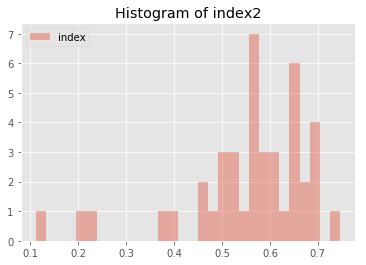

In [38]:
plt.hist(result2['index2'].dropna(), bins = 30, alpha=0.4, label = 'index')
plt.title('Histogram of index2')
plt.legend(loc = 2)
plt.show()